# __Heart Disease Prediction – Part 1__

This notebook aims to build a model that predicts the probability of one having a heart disease, based on the few given features. Amongst the given features are:
1. `Age`
2. `Sex`
3. `Cp` (Chest Pain Type)
4. `Trestbps` (Resting Blood Pressure)
5. `chol` (serum cholestoral in mg/dl)
6. `fbs` (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. `restecg` (resting electrocardiographic results)
8. `thalach` (maximum heart rate achieved)
9. `exang` (exercise induced angina) (1 = yes; 0 = no)
10. `oldpeak` (ST depression induced by exercise relative to rest)
11. `slope` (the slope of the peak exercise ST segment)
12. `ca` (number of major vessels (0-3) colored by flourosopy)
13. `thal` (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. `target` (1 = heart disease, 0 = well)

This dataset is chosen due to the lack of knowledge on machine learning implementations in python. Hence, a dataset with nominal, and numerical dataset is a good place to start. 

On the other hand, there is also a personal interest in the early prediction of any disesase, where with heart disease being one of the most common kind, this dataset was chosen. Due to the just-right complexity of the dataset – with not too little or too many features –, this dataset builds a good foundational model, where other diseases could be fit right on at a later date. 

## __Importing & Checking the data__
CSV -> Pandas Dataframe using `pd.read_csv()`. 
Named the dataframe as df, since its the mosd generic naming method. 

In [7]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

df = pd.read_csv('../Data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df_shuffle = shuffle(df).reset_index(drop = True)
%store df_shuffle
df_shuffle

Stored 'df_shuffle' (DataFrame)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
2,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
3,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
4,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
299,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
300,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
301,51,0,0,130,305,0,1,142,1,1.2,1,0,3,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the above, using `df.info()` to look at the individual datasets, there is no need of any modification to any columns. There are same number of `entries` as well as `Non-Null Count`.

## __Analysis of the Data__

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

target_names = ['Heart Disease', 'Healthy']
df_series = df['target'].value_counts()
df_series.index = target_names
print(df_series)

Heart Disease    165
Healthy          138
Name: target, dtype: int64


From above, we have __165__ patients __with__ heart disease, and __138__ patients who are __without__ heart disease.

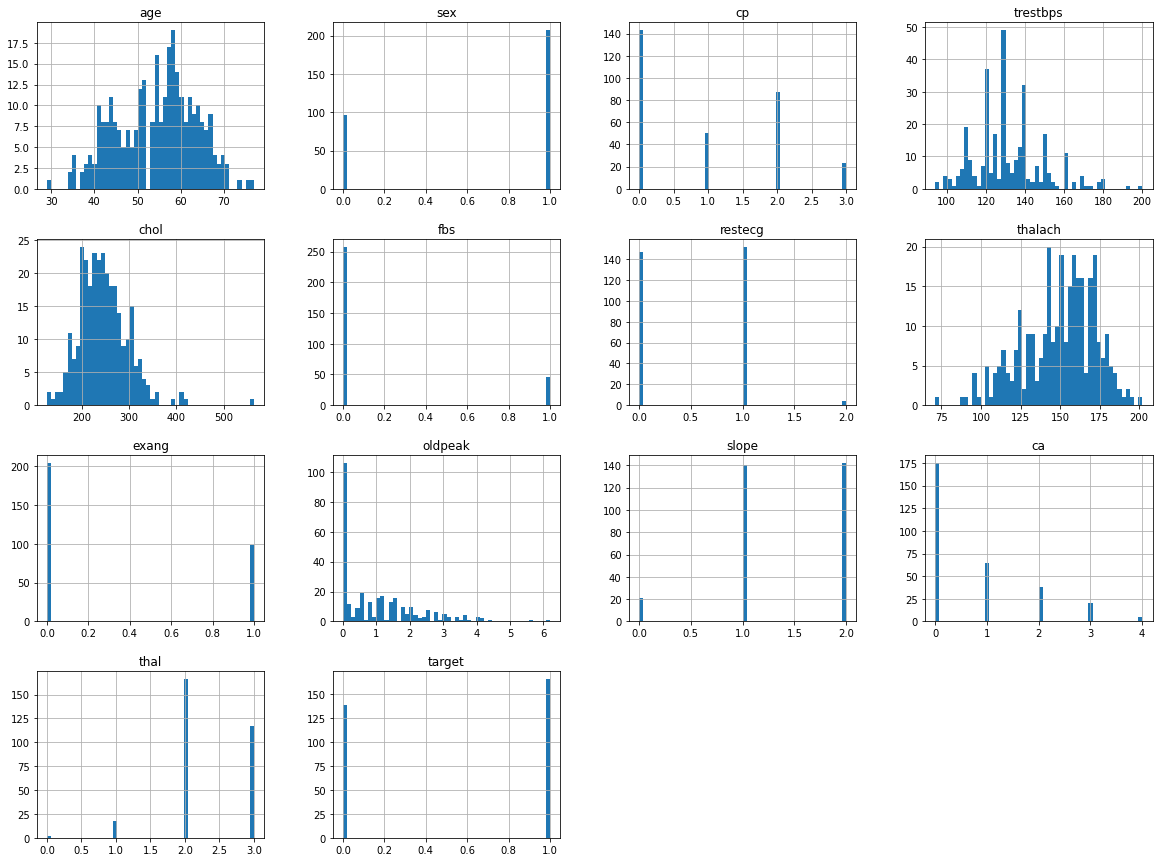

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Just a general histogram for all the features, to roughly understand the data type.

There are somewhat trends of a normally distributed data for the `age`, `trestbpa`, `chol`, and `thalach` features in this dataset. Moreoever, due to its non-categorical nature, there could be more to look at regarding these features. 

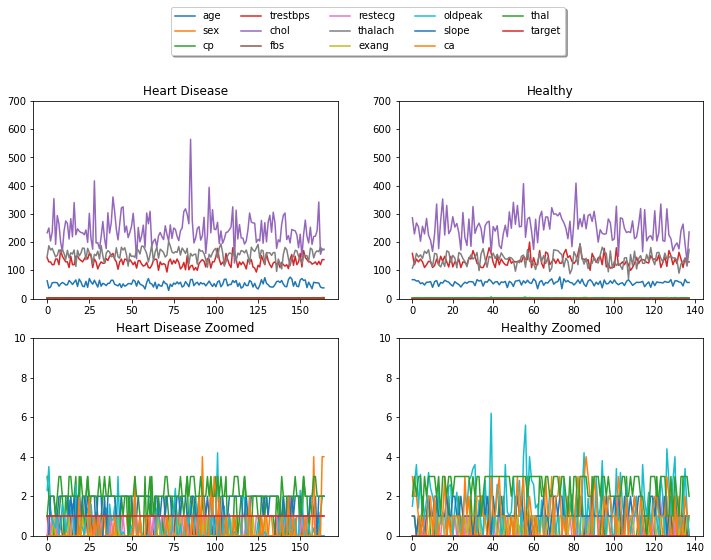

In [25]:
# Setup for side-by-side plots
f = plt.figure(figsize=(12,8))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

# Spliting the Ill and Well
df_ill = df[df['target']==1].reset_index(drop = True)
df_well = df[df['target']==0].reset_index(drop = True)

# Plot for Heart Disease
ax1.plot(df_ill)
ax1.set_ylim([0,700])
ax1.legend(df, loc='upper center', bbox_to_anchor=(1.1, 1.5), ncol=5, fancybox=True, shadow=True)
ax1.title.set_text('Heart Disease')

# Plot for Healthy
ax2.plot(df_well)
ax2.set_ylim([0,700])
ax2.title.set_text('Healthy')

# Plot for Heart Disease (Zoomed)
ax3.plot(df_ill)
ax3.set_ylim([0,10])
ax3.title.set_text('Heart Disease Zoomed')

# Plot for Healthy (Zoomed)
ax4.plot(df_well)
ax4.set_ylim([0,10])
ax4.title.set_text('Healthy Zoomed')
plt.show()

By looking at the __Chol__estoral Levels, __Slope__ of the peak exercise ST segment, __Trestbps__ (Resting Blood Pressure), and __thalach__ (maximum heart rate achieved) of the non-zoomed in graphs, the four features other than __thalach__, features of the ill and well patients have quite similar ranges. 

Hence, a closer look will be needed for __thalach__.

$^{*}$_On the other hand, the bottom two graphs are mainly for categorical features. They will be looked at in a different manner._

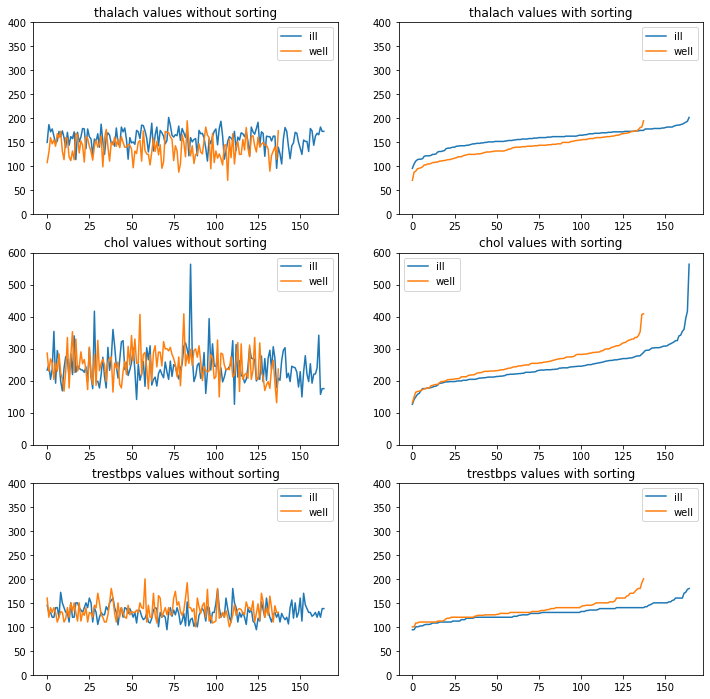

In [14]:
# ASetup for side-by-side plots
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Plot to compare 'thalach' without sort
ax1.plot(df_ill['thalach'])
ax1.plot(df_well['thalach'])
ax1.set_ylim([0, 400])
ax1.legend(["ill","well"])
ax1.title.set_text('thalach values without sorting')

# Plot to compare 'thalach' with sort
ax2.plot(df_ill['thalach'].sort_values().reset_index(drop = True))
ax2.plot(df_well['thalach'].sort_values().reset_index(drop = True))
ax2.set_ylim([0, 400])
ax2.legend(["ill","well"])
ax2.title.set_text('thalach values with sorting')

# Plot to compare 'chol' without sort
ax3.plot(df_ill['chol'])
ax3.plot(df_well['chol'])
ax3.set_ylim([0, 600])
ax3.legend(["ill","well"])
ax3.title.set_text('chol values without sorting')

# Plot to compare 'chol' with sort
ax4.plot(df_ill['chol'].sort_values().reset_index(drop = True))
ax4.plot(df_well['chol'].sort_values().reset_index(drop = True))
ax4.set_ylim([0, 600])
ax4.legend(["ill","well"])
ax4.title.set_text('chol values with sorting')

# Plot to compare 'trestbps' without sort
ax5.plot(df_ill['trestbps'])
ax5.plot(df_well['trestbps'])
ax5.set_ylim([0, 400])
ax5.legend(["ill","well"])
ax5.title.set_text('trestbps values without sorting')

# Plot to compare 'trestbps' with sort
ax6.plot(df_ill['trestbps'].sort_values().reset_index(drop = True))
ax6.plot(df_well['trestbps'].sort_values().reset_index(drop = True))
ax6.set_ylim([0, 400])
ax6.legend(["ill","well"])
ax6.title.set_text('trestbps values with sorting')

plt.show()

From the above plots, it could be seen that the maximum heart rate achieved is slightly lower for those who are well amd higher for those who are well. On ther other hand, cholesterol values for those who are ill seem to be lower than those who are well. A further deduction against age will be needed. 

Further analysis on 'Thalach' against 'age'


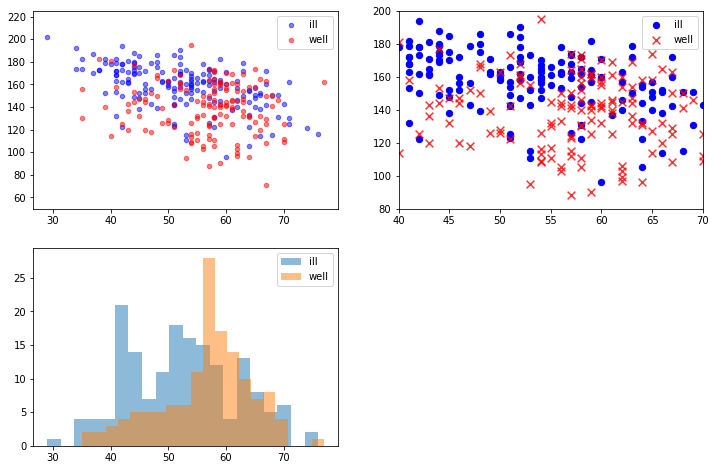

In [15]:
print("Further analysis on 'Thalach' against 'age'")
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.scatter(df_ill['age'], df_ill['thalach'], s=20, label='ill', alpha=0.5, c='blue')
ax1.scatter(df_well['age'], df_well['thalach'], s=20, label='well',alpha=0.5, c='red')
ax1.set_ylim([50, 225])
ax1.legend()
ax2.scatter(df_ill['age'], df_ill['thalach'], s=40, label='ill', alpha=1, c='blue')
ax2.scatter(df_well['age'], df_well['thalach'], s=60, label='well',alpha=0.8, c='red', marker='x')
ax2.set_ylim([80, 200])
ax2.set_xlim([40, 70])
ax2.legend()
ax3.hist(df_ill['age'], bins=20, label='ill', alpha=0.5)
ax3.hist(df_well['age'], bins=20, label='well', alpha=0.5)
ax3.legend()
plt.show()

From the above, at a younger age, up till the age of 57, patients with heart disease tend to have a higher maximum heart rate than those who are well. Where as, it is more scattered for patients whose age is larger than the 57 mark. 

There are also less number of well patients in record for the younger age group, where as it is more even for the larger age group. This might be cause by the more health concious older generation as compared to the younger age group.

Further analysis on 'chol' against 'age'


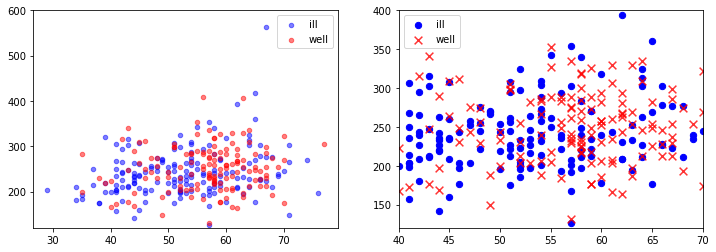

In [16]:
print("Further analysis on 'chol' against 'age'")
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df_ill['age'], df_ill['chol'], s=20, label='ill', alpha=0.5, c='blue')
ax1.scatter(df_well['age'], df_well['chol'], s=20, label='well',alpha=0.5, c='red')
ax1.set_ylim([120, 600])
ax1.legend()
ax2.scatter(df_ill['age'], df_ill['chol'], s=40, label='ill', alpha=1, c='blue')
ax2.scatter(df_well['age'], df_well['chol'], s=60, label='well',alpha=0.8, c='red', marker='x')
ax2.set_ylim([120, 400])
ax2.set_xlim([40, 70])
ax2.legend()
plt.show()

From the above there seem to be no trend of cholesterol and age. Hence, there might be an explaination of how cholesterol varies for all different age groups. On the other hand there might still be a chance of cholesterol levels contributing to whether a patient has or has not any heart disease. 

## __Checking the Correlation of Features__

interval columns not set, guessing: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


<AxesSubplot:>

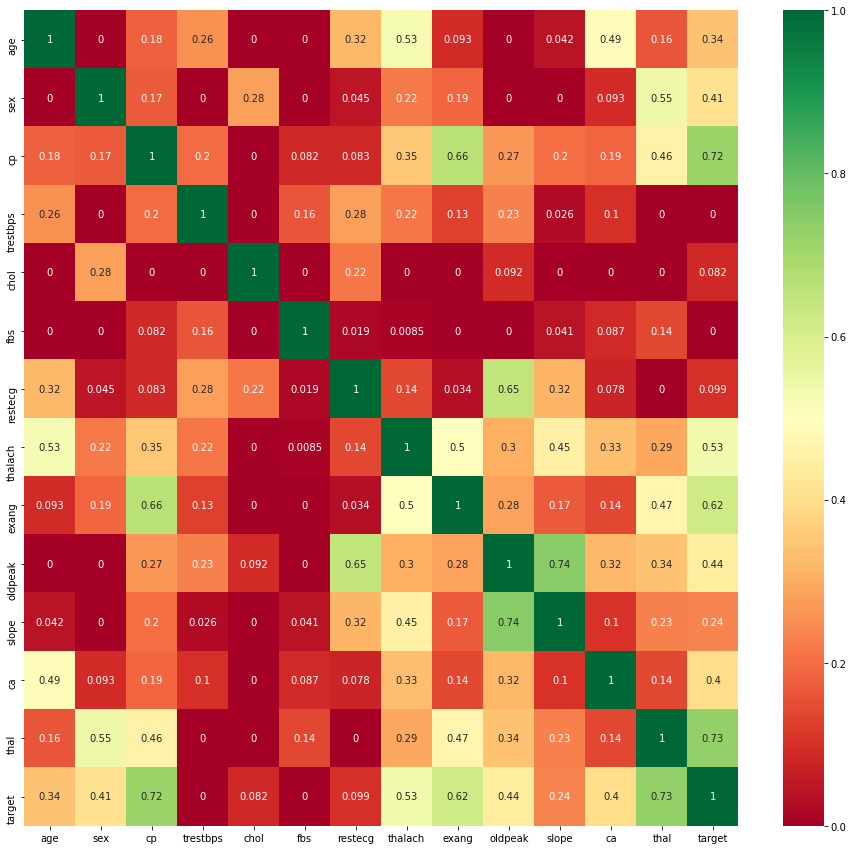

In [17]:
import phik
import seaborn as sns
corr1 = df.phik_matrix()
plt.figure(figsize = (16,15))
sns.heatmap(corr1, annot=True, cmap="RdYlGn")

In [18]:
corr1["target"].sort_values(ascending=False)

target      1.000000
thal        0.730110
cp          0.717290
exang       0.620992
thalach     0.534085
oldpeak     0.437864
sex         0.408884
ca          0.398306
age         0.343086
slope       0.238242
restecg     0.098589
chol        0.082487
trestbps    0.000000
fbs         0.000000
Name: target, dtype: float64

## __Running Naive Bayes Algorithms on the Origial Data Set__

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import plot_roc_curve
mnb = MultinomialNB()

def getConfMatClassReport(df_param):
    df_shuffle = shuffle(df_param)
    X = df_shuffle.drop(['target'], axis=1)
    y = df_shuffle['target']
    model = mnb.fit(X,y)
    y_pred = model.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print("tn:", tn, " fp: ", fp, " fn: ", fn, " tp: ", tp)
    print(classification_report(y, y_pred))
    plot_roc_curve(model, X, y)
    plt.plot([0,1],[0,1], 'r--')
    plt.show()
    print()

Performance data for: Dataset with all features
tn: 97  fp:  41  fn:  34  tp:  131
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       138
           1       0.76      0.79      0.78       165

    accuracy                           0.75       303
   macro avg       0.75      0.75      0.75       303
weighted avg       0.75      0.75      0.75       303



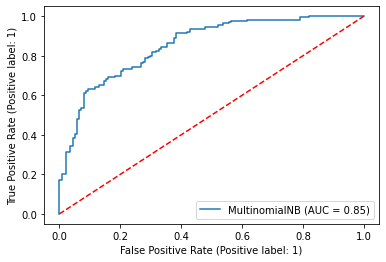

In [20]:
print("Performance data for: Dataset with all features")
getConfMatClassReport(df)

## __Comparison between 3, 5, 7 features for Training & Testing__

In [21]:
feature_3 = df[["target", "thal", "cp", "exang"]]
feature_5 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak"]]
feature_7 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak", "sex", "ca"]]
feature_9 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak", "sex", "ca", "age", "slope"]]
feature_compare = [feature_3, feature_5, feature_7, feature_9]

Preformance stats for 3 Features
-----------------------------------------------------
tn: 105  fp:  33  fn:  42  tp:  123
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       138
           1       0.79      0.75      0.77       165

    accuracy                           0.75       303
   macro avg       0.75      0.75      0.75       303
weighted avg       0.75      0.75      0.75       303



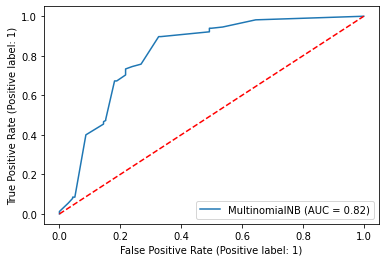


Preformance stats for 5 Features
-----------------------------------------------------
tn: 100  fp:  38  fn:  19  tp:  146
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       138
           1       0.79      0.88      0.84       165

    accuracy                           0.81       303
   macro avg       0.82      0.80      0.81       303
weighted avg       0.81      0.81      0.81       303



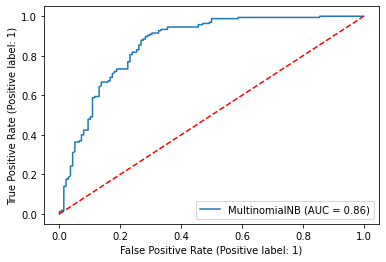


Preformance stats for 7 Features
-----------------------------------------------------
tn: 102  fp:  36  fn:  16  tp:  149
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       138
           1       0.81      0.90      0.85       165

    accuracy                           0.83       303
   macro avg       0.83      0.82      0.82       303
weighted avg       0.83      0.83      0.83       303



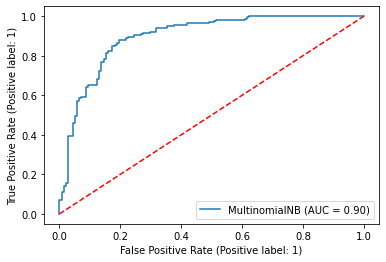


Preformance stats for 9 Features
-----------------------------------------------------
tn: 101  fp:  37  fn:  28  tp:  137
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       138
           1       0.79      0.83      0.81       165

    accuracy                           0.79       303
   macro avg       0.79      0.78      0.78       303
weighted avg       0.79      0.79      0.78       303



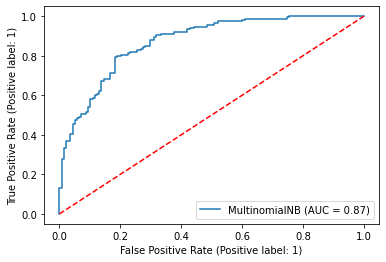

In [22]:
i = 3
for item in feature_compare:
    print("="*53)
    print("Preformance stats for", i, "Features"); i += 2
    print("-"*53)
    getConfMatClassReport(item)
    

Adding a 6, 8 feature classifier for percision

Preformance stats for 6 Features
-----------------------------------------------------
tn: 102  fp:  36  fn:  18  tp:  147
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       138
           1       0.80      0.89      0.84       165

    accuracy                           0.82       303
   macro avg       0.83      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



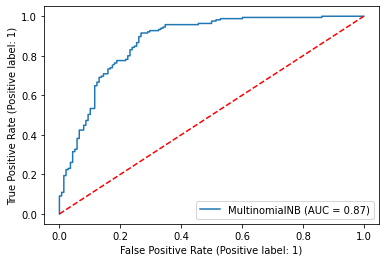


Preformance stats for 8 Features
-----------------------------------------------------
tn: 103  fp:  35  fn:  29  tp:  136
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       138
           1       0.80      0.82      0.81       165

    accuracy                           0.79       303
   macro avg       0.79      0.79      0.79       303
weighted avg       0.79      0.79      0.79       303



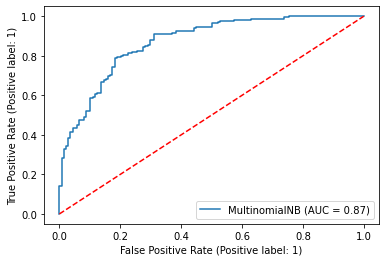

In [23]:
print("="*53)
print("Preformance stats for 6 Features")
print("-"*53)
feature_6 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak", "sex"]]
getConfMatClassReport(feature_6)
print("="*53)
print("Preformance stats for 8 Features")
print("-"*53)
feature_8 = df[["target", "thal", "cp", "exang", "thalach", "oldpeak", "sex", "ca", "age"]]
getConfMatClassReport(feature_8)

From the above output, comparing the Recall and F1-Score of the classifiers for datasets grouped with 3, 5, 7, 8, 9, we could see that for the __Recall__ and __F1-Score__, the model with 7 feature is the most accurate. 
* The __Recall__ (correctly predicted positive observations to the all observations) converges to a maxima aith a 7 feature model.
* The __F1-Score__ (weighted average of Precision and Recall) also converges to a maxima with a 7 feature model.
* the __AUC__ probability was also converged at 7 feature.